# Project : Real estate market in Bangladesh (exploratory analysis)

<span id="toc"></span>

## Table of Contents

1. [Introduction](#intro)
1. [Preliminary Data Wrangling](#wrangling)
1. [Exploratory Data Analysis](#eda)
1. [Conclusions](#conclusion)

[TOC](#toc)

## Introduction
We are going to investigate scrapped properties datasets in order to gain insights on Bangladesh's real estate market. The goal is to build an intuition on the collected data, and prepare a foundation for our model building stage. In particular, we will be interested in the following questions:
1. [Distribution of properties per city](#properties-vs-cities) (Interpretation [here](#properties-vs-cities-interpretation)) (Group 04)
1. [Distribution of properties per type (shop, apartment, ...)](#properties-vs-types) (Interpretation [here](#properties-vs-types-interpretation)) (Group 04)
1. [Distribution of properties per nature (residential, commercial)](#properties-vs-natures) (Interpretation [here](#properties-vs-natures-interpretation))
1. [Distribution of property price per type (shop, apartment, ...)](#prices-vs-types) (Interpretation [here](#prices-vs-types-interpretation)) (Group 04)
1. [Distribution of property price per nature (residential, commercial)](#prices-vs-natures) (Interpretation [here](#properties-vs-natures-interpretation)) (Group 04)
1. [Impact of basic facilities (e.g. number of baths/rooms on) on the prices](#basic-facilities--vs--prices) (Interpretation [here](#basic-facilities--vs--prices--interpretation)) (Group 02)
1. [Impact of facilities (malls, educational institutions, ...) in the vicinity on the prices](#facilities-vs-prices) (Group 02)
1. [Impact of internal amenities (play area, number of car parks, ...) on the prices](#amenities-vs-prices) (Interpretation [here](#amenities-vs-prices--interpretation)) (Group 02)
1. [Is it worth it to be interested in building types (shop, apartment, ...), or is building nature enough to explain the prices ?](#types-vs-prices-worth) (Interpretation [here](#types-vs-prices-worth--interpretation)) (Group 02)


1. [How do property prices fluctuate for same location?](#prices-vs-locations) (Group 03)
1. [How do property prices fluctuate for same property size?](#prices--vs--properties-size) (Group 03)
1. [How do property prices fluctuate for same / similar amenities?](#prices-vs-amenities) (Group 03)
1. [Which amenities are the more frequent in Residential properties ?](#amenities--vs--residential-properties) (Group 03)
1. [Which amenities are the more frequent in Commercial properties ?](#amenities--vs--commercial-properties) (Group 03)
1. [Which amenities have the more impact on price?](#amenities-impact-on-price) (Group 03)


> **Report date : May, 2023**     
> **Created by : `Task 03 - EDA`'s Collaborators and (co-)leads**


In [1]:
# Import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from typing import List, Tuple

%matplotlib inline

In [2]:
# def plot_matrice(df:pd.DataFrame, x_vars:List[str], y_vars:List[str], figsize:List[str]=[10, 20])->None:
    
#     """ 
#         Make a plot matrice of x_vars by y_vars 
    
#         @params:
#             - x_vars: list of strings; contains the features to be plotted on the x-axis
#             - y_vars: list of strings; contains the features to be plotted on the y-axis
            
#         @return None
#     """
    
#     def boxgrid(x, y, **kwargs):
#         """ Quick hack for creating box plots with seaborn's PairGrid. """
#         default_color = sb.color_palette()[0]
#         sb.boxplot(x=x, y=y, color=default_color)

#     plt.figure(figsize = figsize) #plt.figure(figsize = [10, 20])
#     g = sb.PairGrid(data = df , y_vars = y_vars, x_vars = x_vars,
#                     size = 3, aspect = 1.5)
#     g.map(boxgrid)


#     for ax in g.axes.flatten():
#         # rotate x axis labels
#         #ax.set_xlabel(ax.get_xlabel(), rotation = 90)
#         ax.tick_params(rotation=25)

#         # rotate y axis labels
#         # ax.set_ylabel(ax.get_ylabel(), rotation = 0)
#         # set y labels alignment

#         ax.yaxis.get_label().set_horizontalalignment('right')


#     plt.show();

<span id="wrangling"></span>
[TOC](#toc)  

## Preliminary Data Wrangling
        

### General Properties                
Our main data come from over 20+ different real estate website (in Bangladesh) which were scrapped. After cleaning and merging them, we were left with 33701 samples for 22 attributes.

Let's load the dataset.

In [3]:
# CSVs folder
merged_data_folder="../../data/Merged_Data"

# Export folder
exported_img_folder="exported/images"

In [4]:
# Load the merged dataset
df = pd.read_csv(f"{merged_data_folder}/cleaned_merged_datasets.csv")
df.head(2).T

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,0,1
area,1185.0,2464.0
building_type,Apartment,Apartment
building_nature,Residential,Residential
image_url,https://images-cdn.bproperty.com/thumbnails/15...,https://images-cdn.bproperty.com/thumbnails/15...
num_bath_rooms,0.0,4.0
num_bed_rooms,3.0,3.0
price,6100000.0,28900000.0
property_description,Grab This 1185 Sq Ft Beautiful Flat Is Vacant ...,A Vibrant 2464 Sq Ft Residential Flat For Sale...
property_overview,This flat consists of facilities you can think...,Ready to move in somewhere with everything nea...
property_url,https://www.bproperty.com/en/property/details-...,https://www.bproperty.com/en/property/details-...


In [5]:
df.shape

(33701, 22)

### Structure of the dataset
We have 22 features, which are:
* **area**: the area occupied by the property, in sqft
* **building_type**: the type of the property (shop, apartment, duplex, ...)
* **building_nature**: the nature of the property (residential, commercial)
* **image_url**: the link toward the property's image

TODO: add the other features.

In [6]:
# Structure of the properties dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33701 entries, 0 to 33700
Data columns (total 22 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   area                                   33701 non-null  float64
 1   building_type                          33701 non-null  object 
 2   building_nature                        33701 non-null  object 
 3   image_url                              17265 non-null  object 
 4   num_bath_rooms                         33701 non-null  float64
 5   num_bed_rooms                          33701 non-null  float64
 6   price                                  33701 non-null  float64
 7   property_description                   19029 non-null  object 
 8   property_overview                      18509 non-null  object 
 9   property_url                           33679 non-null  object 
 10  purpose                                33701 non-null  object 
 11  ci

In [7]:
# Check N/A values count for each feature
df.isna().sum()

area                                         0
building_type                                0
building_nature                              0
image_url                                16436
num_bath_rooms                               0
num_bed_rooms                                0
price                                        0
property_description                     14672
property_overview                        15192
property_url                                22
purpose                                      0
city                                         0
locality                                     0
address                                   5177
id                                           0
relaxation_amenity_count                     0
security_amenity_count                       0
maintenance_or_cleaning_amenity_count        0
social_amenity_count                         0
expendable_amenity_count                     0
service_staff_amenity_count                  0
unclassify_am

In [8]:
# Check null values count for each feature
df.isnull().sum()

area                                         0
building_type                                0
building_nature                              0
image_url                                16436
num_bath_rooms                               0
num_bed_rooms                                0
price                                        0
property_description                     14672
property_overview                        15192
property_url                                22
purpose                                      0
city                                         0
locality                                     0
address                                   5177
id                                           0
relaxation_amenity_count                     0
security_amenity_count                       0
maintenance_or_cleaning_amenity_count        0
social_amenity_count                         0
expendable_amenity_count                     0
service_staff_amenity_count                  0
unclassify_am

N/A check and null check are giving the same result, so there is nothing to worry about there underlying content. As for the missing values, we should not worry about them since we don't need them in our EDA.

### Data assessement and cleaning

One thing to take note of is that this dataset has already been cleaned (in Task 02). So we will skip this section.

<span id="eda"></span>

[TOC](#toc)               
## Exploratory Data Analysis

<span id="properties-vs-cities"></span>

[EDA](#eda)  
### 1. Distribution of properties per city 
The goal is to know which cities we can make prediction for, as well as understand the how properties are distributed over those cities.      
This question was explored by Group 04.

In [9]:
# Number of properties per city
properties_per_city = df["city"].value_counts()
properties_per_city

Dhaka               28681
Chattogram           3481
Narayanganj City      441
Barishal              352
Gazipur               323
Rangpur                73
Dinajpur               64
Sylhet                 57
Rajshahi               56
Narayanganj            49
Khulna                 39
Bogura                  8
Thakurgaon              8
Mymensingh              8
Cumilla                 5
Manikganj               4
Magura                  4
Narsingdi               4
Chittagong              4
Barguna                 4
Chandpur                3
Jashore                 3
Kushtia                 3
Moulvibazar             2
Nilphamari              2
Tangail                 2
Madaripur               2
Noakhali                2
Brahmanbaria            2
Shariatpur              1
Habiganj                1
Joypurhat               1
Naogaon                 1
Sirajganj               1
Faridpur                1
Feni                    1
Nawabganj               1
Gaibandha               1
Bandarban   

Let's plot the result in order to read it better.

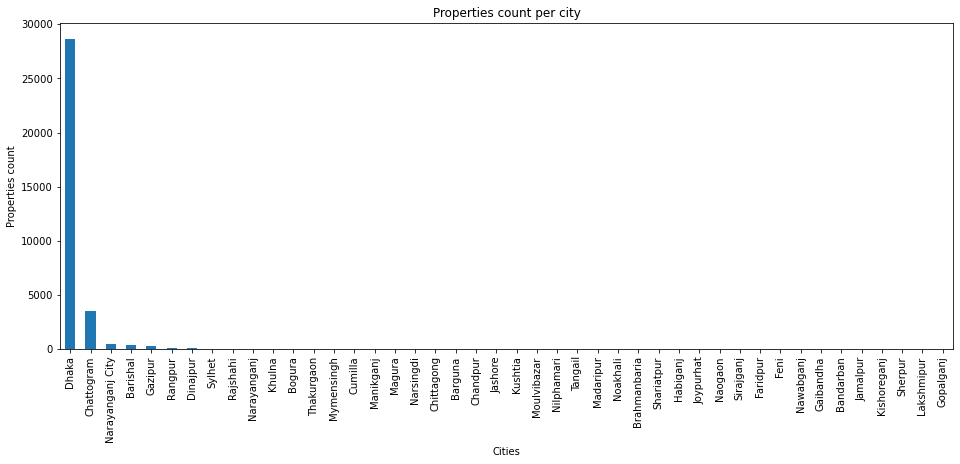

In [10]:
# Plotting properties count per cities
properties_per_city.plot(kind="bar", figsize=(16,6))

plt.xlabel("Cities")
plt.ylabel("Properties count")
plt.title("Properties count per city");

Let's improve the above plot to make it easier to read.

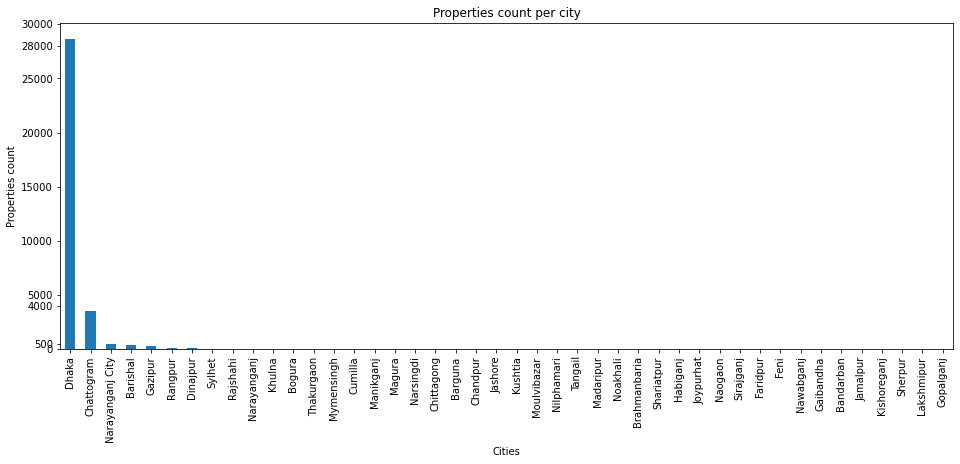

In [11]:
# Plotting properties count per cities
properties_per_city.plot(kind="bar", figsize=(16,6))

y_ticks = [0, 500, 4000, 5000, 10000, 15000, 20000, 25000, 28000, 30000]

yticks= {
    "values":y_ticks,
    "labels":y_ticks
}
# plt.xticks(rotation=90)
plt.yticks(yticks["values"], yticks["labels"])


plt.xlabel("Cities")
plt.ylabel("Properties count")
plt.title("Properties count per city");

<span id="properties-vs-cities-interpretation"></span>

1. Most of our properties are in `Dhaka`, for a total of nearly 28,000 properties. We also have nearly 4000 properties in `Chattogram`.     
1. A negligible amount of properties are in `Narayanganj City`, `Barishal`, `Gazipur`, each of them with a count below 500 properties ..
1. As for the other cities, their properties count is too insignificant.

<br/>

❗ **Recommendation**:
* We are expecting our future models not to be perform well on cities mentioned in (2). We should consider dropping samples with those cities when building models since their low number will make it so that the models will not predict well on them. 
* Cities not part of (1) and (2) should definitively be dropped in order to avoid noise in our future models.

<br/>

💡 The above plot, as well as the interpretations, will be put in our explanatory analysis (or in our presention).

<span id="properties-vs-types"></span>

[EDA](#eda)  
### 2. Distribution of properties per type 
We want to understand how properties are ditributed over the different types, namely shop, apartment, building, ...    
This question was explored by Group 04.

Below are the list of the different types of property with have.

In [12]:
# List of properties types
df["building_type"].unique()

array(['Apartment', 'Shop', 'Floor', 'Office', 'Building',
       'Residential Plot', 'Duplex', 'Commercial Plot', 'Warehouse',
       'Factory', 'House', 'Others'], dtype=object)

In [13]:
# Number of properties per type
properties_per_type_count = df["building_type"].value_counts()
properties_per_type_count

Apartment           26940
Office               2266
Building             1412
Shop                  956
Floor                 880
Residential Plot      875
House                 175
Duplex                 84
Commercial Plot        54
Warehouse              29
Factory                19
Others                 11
Name: building_type, dtype: int64

Let's plot the result.

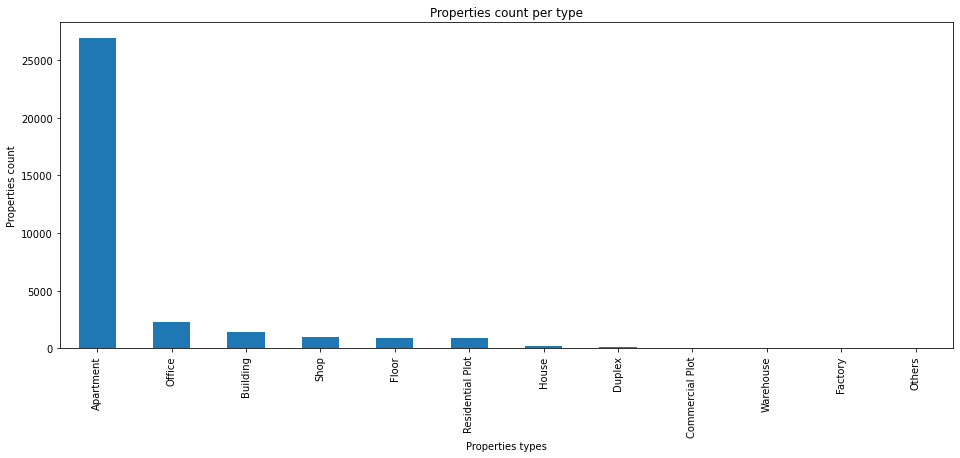

In [14]:
# Plotting the number of properties per type
properties_per_type_count.plot(kind="bar", figsize=(16,6))

plt.xlabel("Properties types")
plt.ylabel("Properties count")
plt.title("Properties count per type");

Let's improve the above plot to make it easier to read.

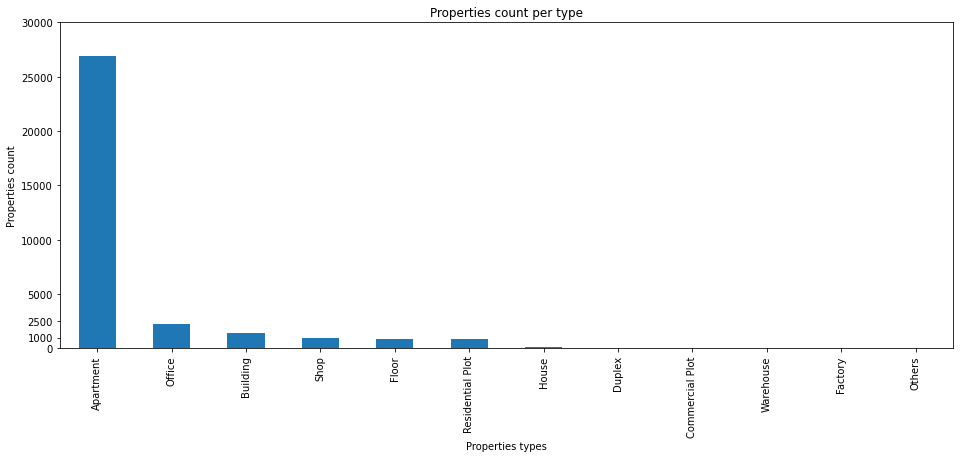

In [15]:
# Plotting the number of properties per type
properties_per_type_count.plot(kind="bar", figsize=(16,6))

y_ticks = [0, 1000, 2500, 5000, 10000, 15000, 20000, 25000, 30000]

yticks= {
    "values":y_ticks,
    "labels":y_ticks
}
# plt.xticks(rotation=90)
plt.yticks(yticks["values"], yticks["labels"])


plt.xlabel("Properties types")
plt.ylabel("Properties count")
plt.title("Properties count per type");

Now let's explore the proportion of the property's types in our dataset.

In [16]:
df.shape

(33701, 22)

In [17]:
# Proportion of each type of property
properties_per_type_prop = properties_per_type_count/df.shape[0]*100
properties_per_type_prop

Apartment           79.938281
Office               6.723836
Building             4.189787
Shop                 2.836711
Floor                2.611198
Residential Plot     2.596362
House                0.519272
Duplex               0.249251
Commercial Plot      0.160233
Warehouse            0.086051
Factory              0.056378
Others               0.032640
Name: building_type, dtype: float64

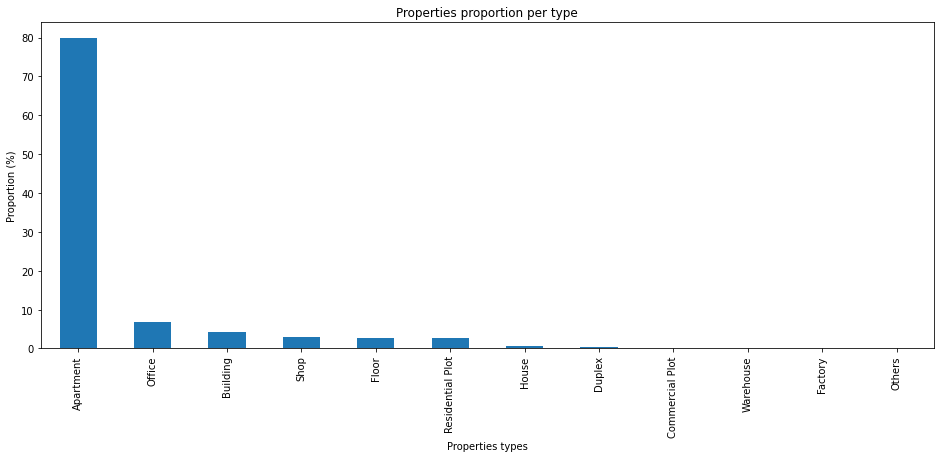

In [18]:
# Plotting the proportion of each type of property
properties_per_type_prop.plot(kind="bar", figsize=(16,6))

plt.xlabel("Properties types")
plt.ylabel("Proportion (%)")
plt.title("Properties proportion per type");

*Note: I didn't use a piechart because the number of elements (property types) is more than 04*

<span id="properties-vs-types-interpretation"></span>

1. Nearly 80% of our properties are `Apartment`, for a total of nearly 27000 samples. We also some `Office`, `Building`, `Shop`, `Floor`, `Residential Plot`, whose number are under 10% of the total dataset; that is to say, their numbers are under 2500. 
1. There are other types of properties, in a very negligible number.


<br/>

❗ **Recommendation**:
* We are expecting our future models to perform well on `Apartment`, and to have and acceptable result for `Office`, `Building`, `Shop`, `Floor`, `Residential Plot`. They are expected to perform poorly on other types of properties.
* Types not part of (1) should be dropped in order to avoid noise in our future models.

<br/>

💡 The above plot, as well as the interpretations, will be put in our explanatory analysis (or in our presention).

<span id="properties-vs-natures"></span>

[EDA](#eda)  
### 3. Distribution of properties per nature 
We want to understand how properties are ditributed over their natures (Residential, Commercial).    


In [19]:
# Number of properties per nature
properties_per_nature_count = df["building_nature"].value_counts()
properties_per_nature_count

Residential    27220
Commercial      6481
Name: building_nature, dtype: int64

Let's plot the result.

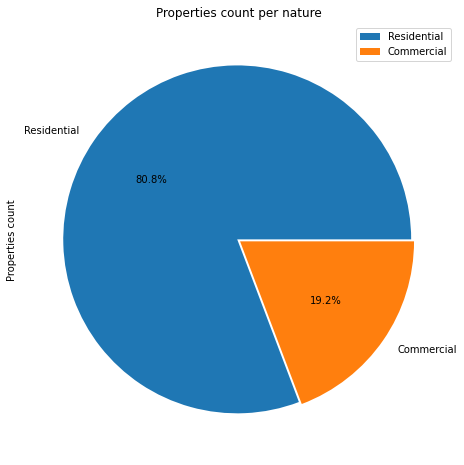

In [20]:
# Plotting the number of properties per nature
properties_per_nature_count.plot(kind="pie",
                                 figsize=(8,8),
                                 autopct='%1.1f%%',
                                 explode=[0.01, 0.01],
                                 legend=True
                                )

# plt.xlabel("Properties natures")
plt.ylabel("Properties count")
plt.title("Properties count per nature");

<span id="properties-vs-natures-interpretation"></span>

81% of our properties are `Residential`, while the rest are `Commercial`.

<br/>

💡 The above plot, as well as the interpretations, will be put in our explanatory analysis (or in our presention).

<span id="prices-vs-types"></span>

[EDA](#eda)  
### 4. Distribution of property prices per type 
We want to know the prices are distributed over the different types of properties (shop, apartment, ...).    
This question was explored by Group 04.


In [21]:
# Mean price per building type
mean_price_per_type = df[ ["building_type","purpose","price"] ].groupby(["building_type","purpose"], as_index=False) \
                                                               .mean()

# Giving more relevant name to column
mean_price_per_type.rename(columns={
    "price":"mean_price"
}, inplace=True)
    
mean_price_per_type

,building_type,purpose,mean_price
0,Apartment,Rent,6.466751e+06
1,Apartment,Sale,2.671628e+09
2,Building,Rent,8.760356e+07
3,Building,Sale,7.466818e+07
4,Commercial Plot,Rent,2.253519e+05
5,Commercial Plot,Sale,8.602407e+07
6,Duplex,Rent,2.824167e+05
7,Duplex,Sale,4.528889e+07
8,Factory,Rent,3.767947e+05
9,Floor,Rent,4.798500e+05


In [22]:
# Separating the dataframe mean prices according to purpose
mean_price_per_type__rent= mean_price_per_type[mean_price_per_type["purpose"]=="Rent"]
mean_price_per_type__sale= mean_price_per_type[mean_price_per_type["purpose"]=="Sale"]

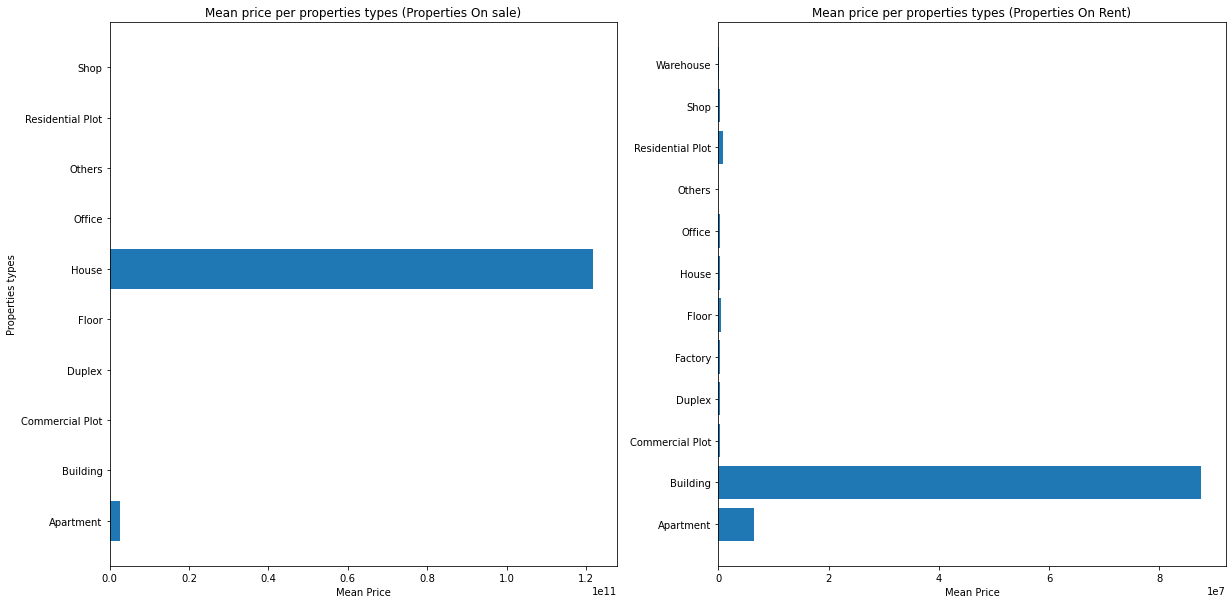

In [23]:
# Plotting the mean prices for sale and rent data
fig, ax = plt.subplots(1,2)

ax[0].barh(width=mean_price_per_type__sale["mean_price"],y=mean_price_per_type__sale["building_type"])
# ax[0].set_xscale("log")
ax[0].set_title("Mean price per properties types (Properties On sale)")
ax[0].set_xlabel("Mean Price")
ax[0].set_ylabel("Properties types")



ax[1].barh(width=mean_price_per_type__rent["mean_price"],y=mean_price_per_type__rent["building_type"])
# ax[1].set_xscale("log")
ax[1].set_title("Mean price per properties types (Properties On Rent)")
ax[1].set_xlabel("Mean Price")

fig.set_size_inches([20,10])
plt.show()

The above plot is not easily readable. Let's try to improve it by using a log scale on the x-axis

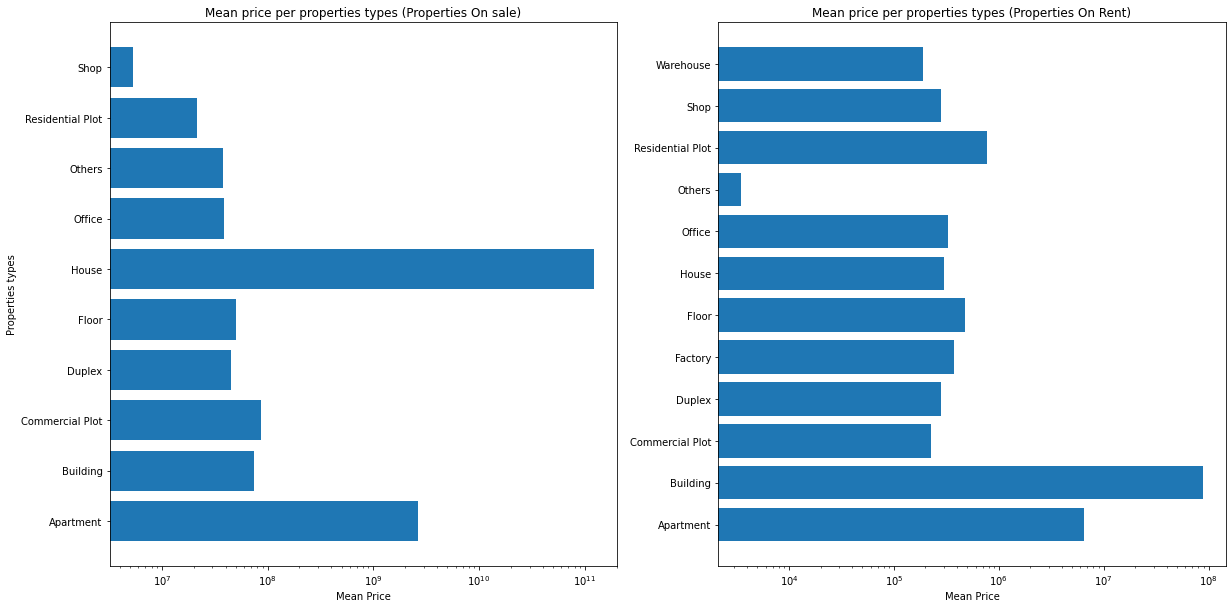

In [24]:
# Plotting the mean prices for sale and rent data
fig, ax = plt.subplots(1,2)

ax[0].barh(width=mean_price_per_type__sale["mean_price"],y=mean_price_per_type__sale["building_type"])
ax[0].set_xscale("log")
ax[0].set_title("Mean price per properties types (Properties On sale)")
ax[0].set_xlabel("Mean Price")
ax[0].set_ylabel("Properties types")


ax[1].barh(width=mean_price_per_type__rent["mean_price"],y=mean_price_per_type__rent["building_type"])
ax[1].set_xscale("log")
ax[1].set_title("Mean price per properties types (Properties On Rent)")
ax[1].set_xlabel("Mean Price")

fig.set_size_inches([20,10])
plt.show()

<span id="prices-vs-types-interpretation"></span>

**TODO** : 
- Provide an interpretation for the above plots.
- Try to make the same plot after dividing the prices by 10.000 (price will thus be in thousand)
- Use the same bins on the x-axis of the two plots (mandatory)
- Define order of the values on the y-axis (to make sure that each value is at the same position on the two plots) (mandatory)
- Make sure that each property type is on the y-axis, with a value of zero if necessary (mandatory)
<br/>



<span id="properties-vs-natures"></span>

[EDA](#eda)  
### 5. Distribution of property prices per nature
The goal is to understand how the prices differentiate between `Commercial` and `Residential` areas. For example, we want to know if Commercial properties generally have a higher prices compared to Residential properties, or if it is the other way around.          
This question was explored by Group 04.


In [25]:
# Mean price per building nature
mean_price_per_nature = df[ ["building_nature","purpose","price"] ].groupby(["building_nature","purpose"], as_index=False) \
                                                               .mean()

# Giving more relevant name to column
mean_price_per_nature.rename(columns={
    "price":"mean_price"
}, inplace=True)
    
mean_price_per_nature

,building_nature,purpose,mean_price
0,Commercial,Rent,2.015635e+07
1,Commercial,Sale,2.632762e+07
2,Residential,Rent,6.794873e+06
3,Residential,Sale,2.932132e+09


Let's observe the result on a plot.

In [26]:
# Separating the dataframe mean prices according to purpose
mean_price_per_nature__rent= mean_price_per_nature[mean_price_per_nature["purpose"]=="Rent"]
mean_price_per_nature__sale= mean_price_per_nature[mean_price_per_nature["purpose"]=="Sale"]

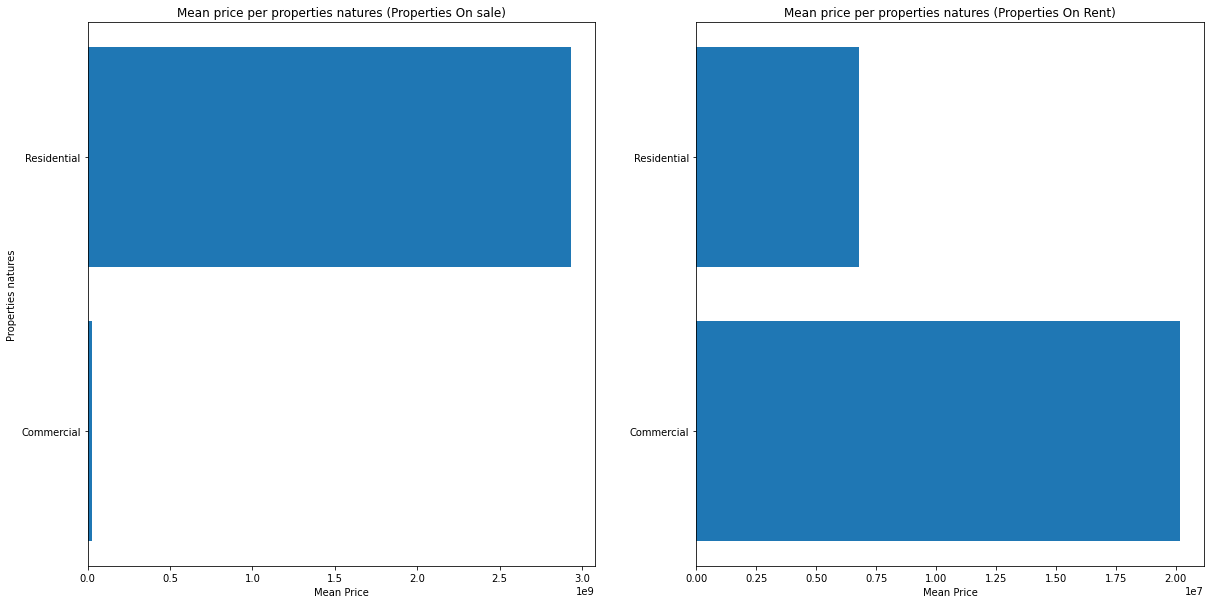

In [27]:
# Plotting the mean prices for sale and rent data
fig, ax = plt.subplots(1,2)

ax[0].barh(width=mean_price_per_nature__sale["mean_price"],y=mean_price_per_nature__sale["building_nature"])
# ax[0].set_xscale("log")
ax[0].set_title("Mean price per properties natures (Properties On sale)")
ax[0].set_xlabel("Mean Price")
ax[0].set_ylabel("Properties natures")


ax[1].barh(width=mean_price_per_nature__rent["mean_price"],y=mean_price_per_nature__rent["building_nature"])
# ax[1].set_xscale("log")
ax[1].set_title("Mean price per properties natures (Properties On Rent)")
ax[1].set_xlabel("Mean Price")

fig.set_size_inches([20,10])

# plt.title("Mean price per properties natures")
plt.show()

<span id="properties-vs-natures-interpretation"></span>

TODO:
- provide interpretation for the above plots

Let's us plot the place distribution per purpose (Sale/ Rent).

##### Distribution of prices for properties to rent

In [28]:
# Get the rent prices
rent_prices = df[df["purpose"]=="Rent"]["price"]
rent_prices

18        500000.0
10855    1213000.0
10856     210000.0
10857     126000.0
10858     360000.0
           ...    
33696        110.0
33697        100.0
33698        120.0
33699        120.0
33700         70.0
Name: price, Length: 20723, dtype: float64

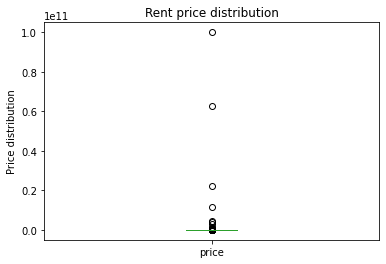

In [29]:
# Price distribution for Rent
rent_prices.plot(kind="box")

# plt.xlabel("Departure delay (in minutes)")
plt.ylabel("Price distribution")
plt.title("Rent price distribution");

Let's zoom-in the relevant part of our x-axis.

In [30]:
# 0.2 * 1e11

In [31]:
rent_prices.describe()

count    2.072300e+04
mean     1.048616e+07
std      8.390854e+08
min      0.000000e+00
25%      1.800000e+04
50%      3.300000e+04
75%      1.100000e+05
max      1.000000e+11
Name: price, dtype: float64

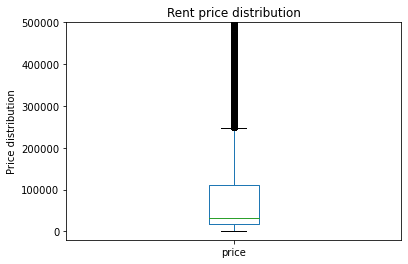

In [32]:
# Price distribution for Rent
rent_prices.plot(kind="box")

plt.ylim(-2*1e4, 0.5 * 1e6)

# plt.xlabel("Departure delay (in minutes)")
plt.ylabel("Price distribution")
plt.title("Rent price distribution");

We are going to update the y-ticks value in order to make the plot easier to read.

In [33]:
# Meadian price
rent_prices.median()

33000.0

In [34]:
# Min price
rent_prices.min()

0.0

In [35]:
# Mean price
rent_prices.min()

0.0

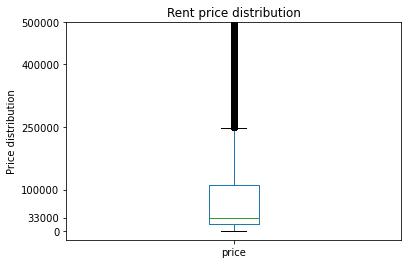

In [36]:
# Price distribution for Rent
rent_prices.plot(kind="box")

y_ticks = [0, 33000, 100000, 250000, 400000,500000]

yticks= {
    "values":y_ticks,
    "labels":y_ticks
}
# plt.xticks(rotation=90)
plt.yticks(yticks["values"], yticks["labels"])

plt.ylim(-2*1e4, 0.5 * 1e6)

# plt.xlabel("Departure delay (in minutes)")
plt.ylabel("Price distribution")
plt.title("Rent price distribution");

TODO:
- Provide interpretation for the above plot

##### Distribution of prices for properties to sale

In [37]:
# Get the sale prices
sale_prices = df[df["purpose"]=="Sale"]["price"]
sale_prices

0         6100000.0
1        28900000.0
2         7500000.0
3        20000000.0
4        10800000.0
            ...    
32300    12200000.0
32316     1300000.0
32317      140000.0
32319    11000000.0
32321      750000.0
Name: price, Length: 12978, dtype: float64

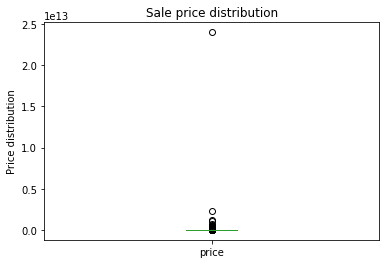

In [38]:
# Price distribution for Rent
sale_prices.plot(kind="box")

# plt.xlabel("Departure delay (in minutes)")
plt.ylabel("Price distribution")
plt.title("Sale price distribution");

Let's zoom-in the relevant part of our x-axis.

In [39]:
sale_prices.describe()

count    1.297800e+04
mean     2.762862e+09
std      2.124047e+11
min      0.000000e+00
25%      5.000000e+06
50%      7.350000e+06
75%      1.150000e+07
max      2.400000e+13
Name: price, dtype: float64

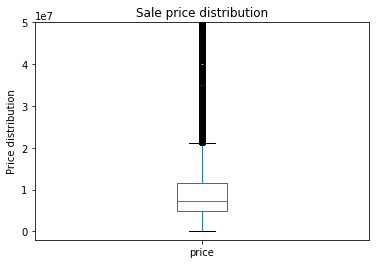

In [40]:
# Price distribution for Sale
sale_prices.plot(kind="box")

plt.ylim(-2*1e6, 0.5 * 1e8)

# plt.xlabel("Departure delay (in minutes)")
plt.ylabel("Price distribution")
plt.title("Sale price distribution");

TODO: 
- Add interpretation for the above plot.

<span id="basic-facilities--vs--prices"></span>

 
[EDA](#eda)  
### 6. Impact of basic facilities on the prices
We want to know how the basic facilities (e.g. number of baths/rooms, area) on impact the prices.

This question was explored by Group 02.


#### Impact of properties areas on the prices

In [41]:
# Distribution of prices for 'Rent'
percl_price_Rent = df[(df["purpose"] == "Rent")]["price"].describe(percentiles=[0.02, .3, .6, .9, 0.95, .99])
percl_price_Rent

count    2.072300e+04
mean     1.048616e+07
std      8.390854e+08
min      0.000000e+00
2%       0.000000e+00
30%      2.000000e+04
50%      3.300000e+04
60%      5.000000e+04
90%      3.800000e+05
95%      7.350000e+05
99%      2.500000e+06
max      1.000000e+11
Name: price, dtype: float64

In [42]:
# Distribution of prices for 'Sale'
percl_price_Sale = df[(df["purpose"] == "Sale")]["price"].describe(percentiles=[0.02, .3, .6, .9, 0.95, .99])
percl_price_Sale

count    1.297800e+04
mean     2.762862e+09
std      2.124047e+11
min      0.000000e+00
2%       2.263500e+06
30%      5.500000e+06
50%      7.350000e+06
60%      8.350000e+06
90%      2.100000e+07
95%      3.800000e+07
99%      5.423000e+09
max      2.400000e+13
Name: price, dtype: float64

In [43]:
# Distribution of area for 'Rent'
percl_area_Rent = df[(df["purpose"] == "Rent")]["area"].describe(percentiles=[0.05, .3, .6, .9, 0.95, .99])
percl_area_Rent

count    2.072300e+04
mean     4.241257e+03
std      1.555526e+05
min      0.000000e+00
5%       3.000000e+00
30%      1.000000e+03
50%      1.400000e+03
60%      1.650000e+03
90%      3.373000e+03
95%      5.000000e+03
99%      1.200000e+04
max      1.450147e+07
Name: area, dtype: float64

In [44]:
# Distribution of area for 'Sale'
percl_area_Sale = df[(df["purpose"] == "Sale")]["area"].describe(percentiles=[0.05, .3, .6, .9, 0.95, .99])
percl_area_Sale

count     12978.000000
mean       1664.862321
std        3755.222407
min           1.000000
5%          650.000000
30%        1150.000000
50%        1320.000000
60%        1445.000000
90%        2289.300000
95%        3600.000000
99%        7218.216000
max      296600.000000
Name: area, dtype: float64

Let's recall the proportion of each property type in the dataset.

In [45]:
# Proportion of each type of property (%)
properties_per_type_prop

Apartment           79.938281
Office               6.723836
Building             4.189787
Shop                 2.836711
Floor                2.611198
Residential Plot     2.596362
House                0.519272
Duplex               0.249251
Commercial Plot      0.160233
Warehouse            0.086051
Factory              0.056378
Others               0.032640
Name: building_type, dtype: float64

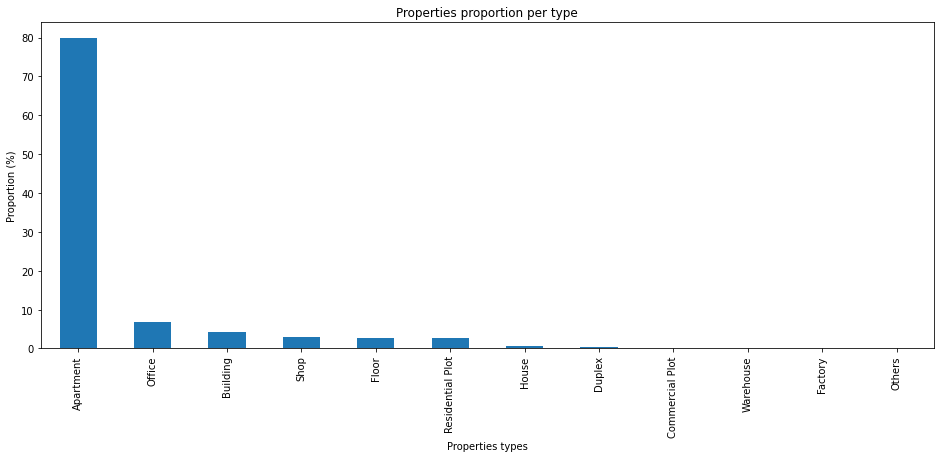

In [46]:
# Plotting the proportion of each type of property
properties_per_type_prop.plot(kind="bar", figsize=(16,6))

plt.xlabel("Properties types")
plt.ylabel("Proportion (%)")
plt.title("Properties proportion per type");

 Close to 80% of the properties are of type 'Apartment'

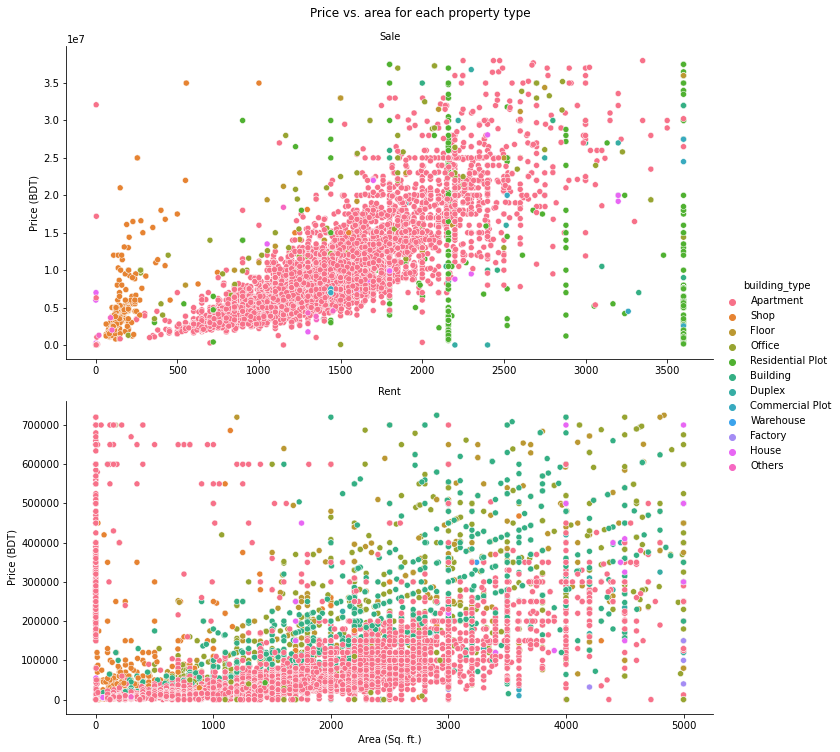

In [47]:
# Prepare / subset the data:
# Get all the data that has price and area outliers removed (= all values above 95 percentile)
data = df[((df.purpose == 'Rent') &
                  (df.area <= percl_area_Rent['95%']) & 
                  (df.price <= percl_price_Rent['95%'])
                 ) | 
                 ((df.purpose == 'Sale') & 
                  (df.area <= percl_area_Sale['95%']) & 
                  (df.price <= percl_price_Sale['95%'])
                 )
                 ]

g = sb.relplot(y="price", x="area", 
                data = data,
                row = "purpose",
                hue = "building_type",
#                 size = "num_bed_rooms",
                kind="scatter",
                facet_kws={'sharey': False, 'sharex': False},
                height=5, aspect=2
               )

g.set_titles('{row_name}', fontsize=24)
g.set_axis_labels('Area (Sq. ft.)', 'Price (BDT)')

# g.fig.suptitle('Price vs. area for each property type and purpose', fontsize=12, y=1.02)
g.fig.suptitle('Price vs. area for each property type', fontsize=12, y=1.02)
plt.plot()

# Exporting the plot image
g.savefig(f"{exported_img_folder}/Price-vs-Area-Scatterplot.jpg")

* We see that the influence of "area" (size in Sq. ft) on price is more straightforwardly visible for "Aparments" under "Sale" purpose such that there is a linear increase in price with increase in area. For "Aparments" under "Rent" the picture is not that clear--there doesn't seem to be a direct linear relationship. Note that:
    * Close to 80% of the properties are of type 'Apartment'.
    * → **This possibly means that we have very little info about other property types, and the number of data points with info about 'area' is probably not sufficient**
    - The impact of both, the number of bathrooms and bedrooms on price *seems to be* linear (could even be exponential), and again the pattern is clearer for "Sale" purpose than for "Rent" purpose (for bathrooms [see this](#price-vs-bathroom) and for bedrooms [see this](#price-vs-bedroom)). Note that:
        - The info is not available (or is zero) for bathrooms in around 40%, and for bedrooms, in around 20% of the data ([see this](#bath-bed-Zero))

TODO:
- provide the interpretation for the above plots

#### Impact of properties number of bathrooms and number of bedrooms on the prices
We want to understand if (and how) the number of bathrooms and number of bedrooms impact the prices

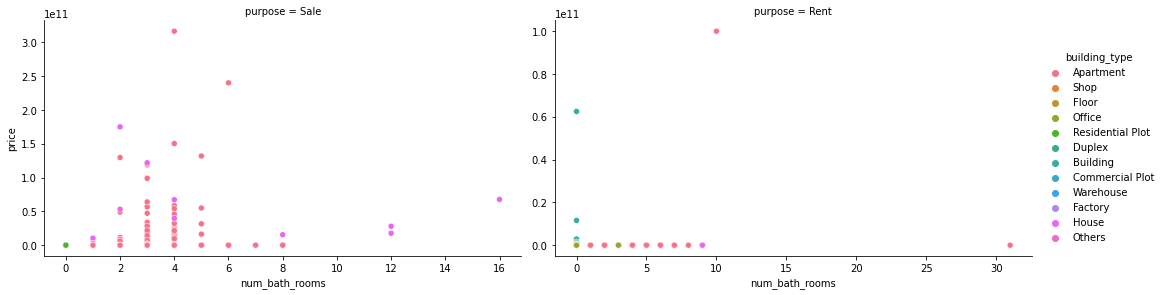

In [48]:
g = sb.relplot(y="price", x="num_bath_rooms", 
                data = df[(((df.purpose == 'Rent') & 
                                      (df.area <= percl_area_Rent['95%'])) | 
                                     ((df.purpose == 'Sale') & 
                                      (df.area <= percl_area_Sale['95%'])
                                     ))],
                col = "purpose",
                hue = "building_type",
                kind="scatter",
                facet_kws={'sharey': False, 'sharex': False},
                height=4, aspect=1.8
               )
# g.fig.set_size_inches(10, 10)
plt.plot();

TODO: 
- commenting the above plots, and give them a title
- review if possible the labels on the x-axis

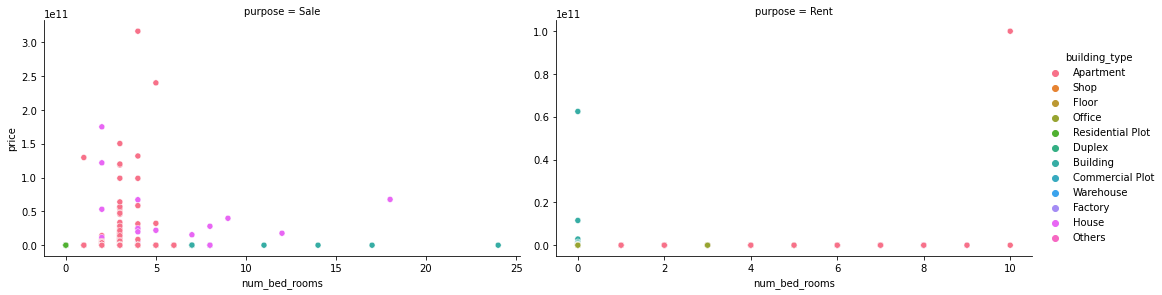

In [49]:
g = sb.relplot(y="price", x="num_bed_rooms", 
                data = df[(((df.purpose == 'Rent') & 
                                      (df.area <= percl_area_Rent['95%'])) | 
                                     ((df.purpose == 'Sale') & 
                                      (df.area <= percl_area_Sale['95%'])
                                     ))],
                col = "purpose",
                hue = "building_type",
                kind="scatter",
                facet_kws={'sharey': False, 'sharex': False},
                height=4, aspect=1.8
               )
# g.fig.set_size_inches(50, 5)
plt.plot();

TODO: 
- commenting the above plots, and give them a title
- review if possible the labels on the x-axis

The individual scatterplots by properties types for "price vs bathrooms count" or "price vs bedrooms count" don't seem very informative, which is perfectly normal since the variable on the x-axis in the above two plots are discrete quantitative variable (not continuous quantitative variable). Boxplots should be more informative for us.

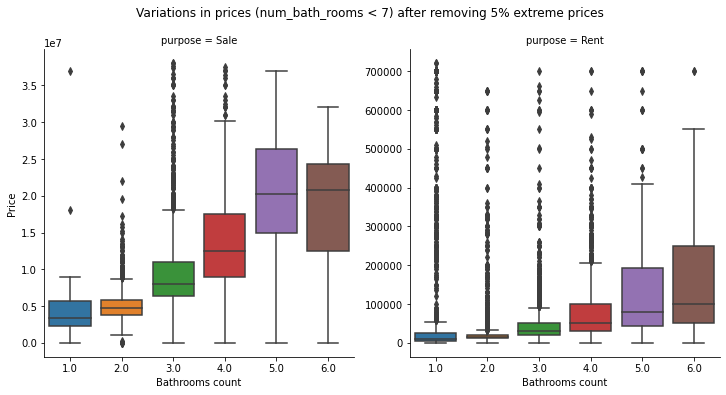

In [50]:
# Plotting the prices variations per number of bathrooms

# plt.figure(figsize=(12, 3))
g = sb.catplot(y="price", x="num_bath_rooms", 
            data = df[(((df.purpose == 'Rent') & 
                                  (df.price <= percl_price_Rent['95%'])
                                 ) |
                                 ((df.purpose == 'Sale') & 
                                  (df.price <= percl_price_Sale['95%'])
                                 )
                                ) &
                                (df.num_bath_rooms > 0) &
                                (df.num_bath_rooms <= 6)
                                   ], 
                kind="box",
               col= "purpose", 
               sharey = False
           )

g.set_axis_labels('Bathrooms count', 'Price')

# g.set_titles('{row_name}', fontsize=24)
# g.set_axis_labels('Bathrooms count', 'Price')

# Add row title
fig = g.fig
# fig.suptitle(f'Row: {row_var}', y=1.05)
fig.suptitle("Variations in prices (num_bath_rooms < 7) after removing 5% extreme prices", y=1.05)

plt.plot()


# Exporting the plot image
g.savefig(f"{exported_img_folder}/Price--vs--bathrooms-count.jpg");

TODO:
- provide interpretation for the above plot
- make a similar plot for Bedrooms count vs price

<span id="basic-facilities--vs--prices--interpretation"></span>


In summary, we can conclude that....       
TODO : provide a summary of the interpretation of:
- area vs price analysis
- bathooms count vs price analysis
- bedrooms count vs price analysis


<br/>

💡 The plots of `area vs price analysis`, `bathooms count vs price analysis`, `bedrooms count vs price analysis`, as well as their interpretation, will be put in our explanatory analysis (or in our presention).

<span id="facilities-vs-prices"></span>
 
[EDA](#eda)  
### 7. Impact of facilities in the vicinity on the prices
This time, we want to understand how facilities in the vicinity, such malls or educational institutions, can impact the prices.     
This question was explored by Group 02.


This question cannot be answered because required infos about those facilities are not available in the dataset.

<span id="amenities-vs-prices"></span>
 
[EDA](#eda)  
### 8.Impact of internal amenities on the prices
We want to know how internal amenities (play area, number of car parks, ...) impact the price.     
This question was explored by Group 02.


We don't have separate info about the internal amenities; so let's plot the impact of all the amenities we have

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33701 entries, 0 to 33700
Data columns (total 22 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   area                                   33701 non-null  float64
 1   building_type                          33701 non-null  object 
 2   building_nature                        33701 non-null  object 
 3   image_url                              17265 non-null  object 
 4   num_bath_rooms                         33701 non-null  float64
 5   num_bed_rooms                          33701 non-null  float64
 6   price                                  33701 non-null  float64
 7   property_description                   19029 non-null  object 
 8   property_overview                      18509 non-null  object 
 9   property_url                           33679 non-null  object 
 10  purpose                                33701 non-null  object 
 11  ci

In [52]:
amenities_vars =  ["relaxation_amenity_count","security_amenity_count","maintenance_or_cleaning_amenity_count",
                  "social_amenity_count","expendable_amenity_count","service_staff_amenity_count",
                   "unclassify_amenity_count"]
amenities_vars

['relaxation_amenity_count',
 'security_amenity_count',
 'maintenance_or_cleaning_amenity_count',
 'social_amenity_count',
 'expendable_amenity_count',
 'service_staff_amenity_count',
 'unclassify_amenity_count']

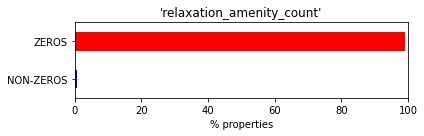

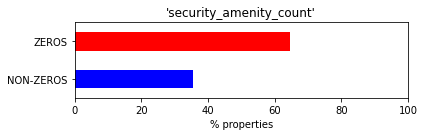

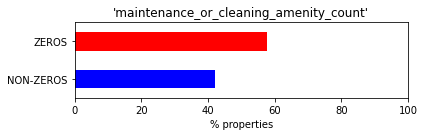

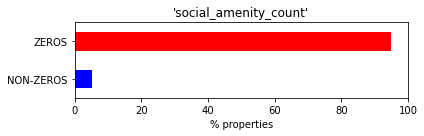

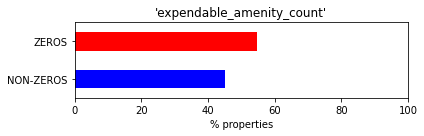

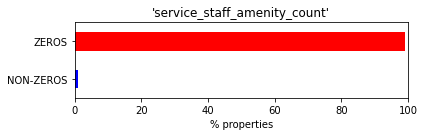

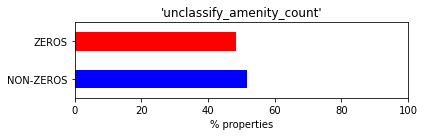

In [53]:
# Plotting how each amenity type variable is distributed over the dataset

for col_name in amenities_vars:
    # col_name = 'security_amenity_count'
    # print(df[col_name].value_counts())

    df_TMP = pd.Series(np.where(df[col_name] == 0, 'ZEROS', 'NON-ZEROS'))
    percentages = (df_TMP.value_counts() / df_TMP.value_counts().sum()) * 100
    
#     print()
#     print("------------------------------------")
#     print(percentages)

    fig, ax = plt.subplots(figsize=(6, 2))
    percentages.sort_index().plot.barh(color=['blue', 'red'])

    # Set x and y axis labels
    plt.xlabel('% properties')
    plt.ylabel('')
    # plt.title(f"'{col_name}': zero vs. non-zero entries")
    plt.title(f"'{col_name}'")
    ax.set_xlim(0, 100)

    plt.tight_layout()
    
#     plt.title("Amenity types variable distribution over the dataset")

    # Show the plot
    plt.show()


TODO:
- comment the above plot.

In [54]:
# Recall Price percentile range for 'Rent'
percl_price_Rent

count    2.072300e+04
mean     1.048616e+07
std      8.390854e+08
min      0.000000e+00
2%       0.000000e+00
30%      2.000000e+04
50%      3.300000e+04
60%      5.000000e+04
90%      3.800000e+05
95%      7.350000e+05
99%      2.500000e+06
max      1.000000e+11
Name: price, dtype: float64

In [55]:
# Recall Price percentile range for 'Sale'
percl_price_Sale

count    1.297800e+04
mean     2.762862e+09
std      2.124047e+11
min      0.000000e+00
2%       2.263500e+06
30%      5.500000e+06
50%      7.350000e+06
60%      8.350000e+06
90%      2.100000e+07
95%      3.800000e+07
99%      5.423000e+09
max      2.400000e+13
Name: price, dtype: float64

Now we are going to plot the distribution of price over the count of each amenity type count.

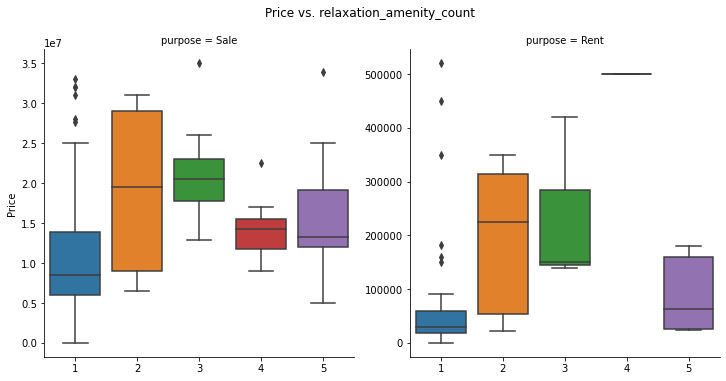

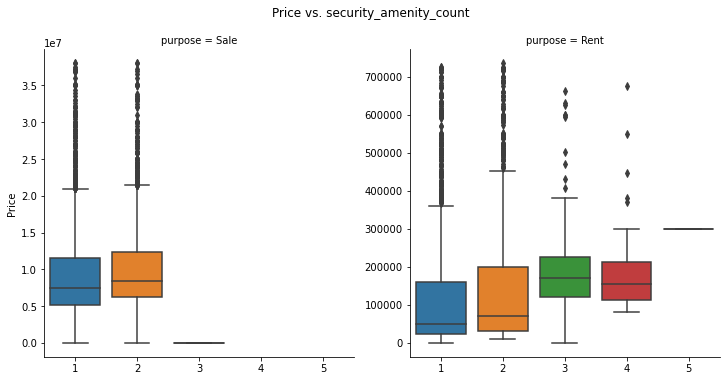

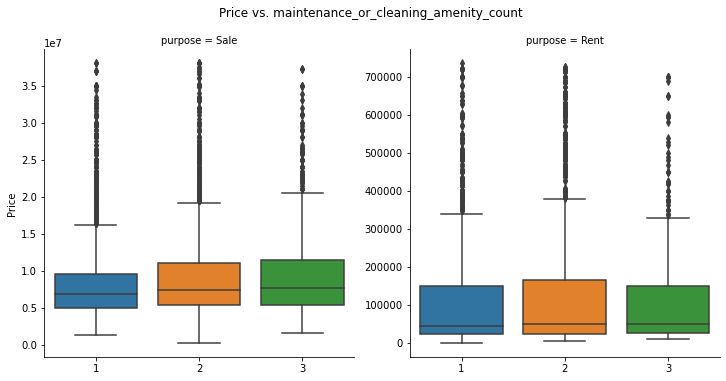

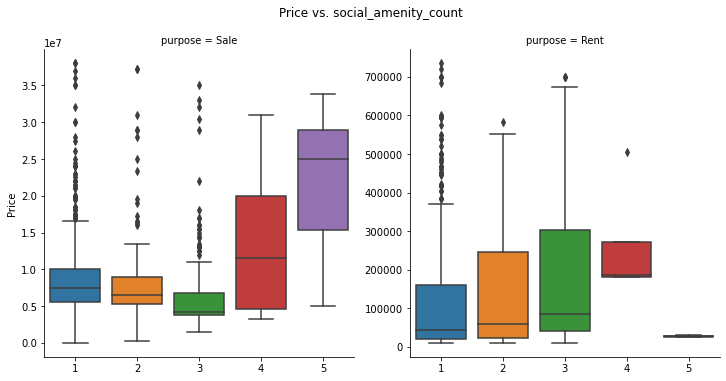

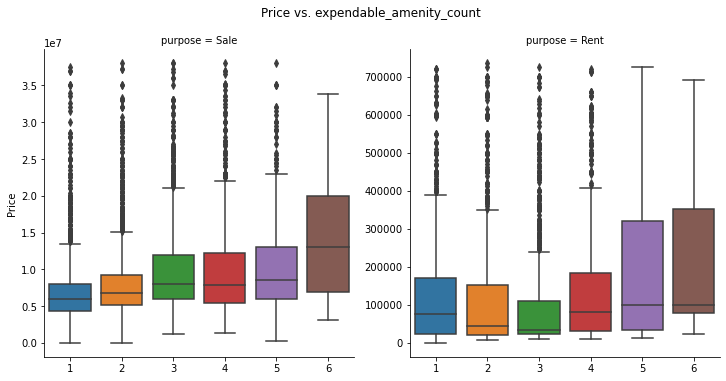

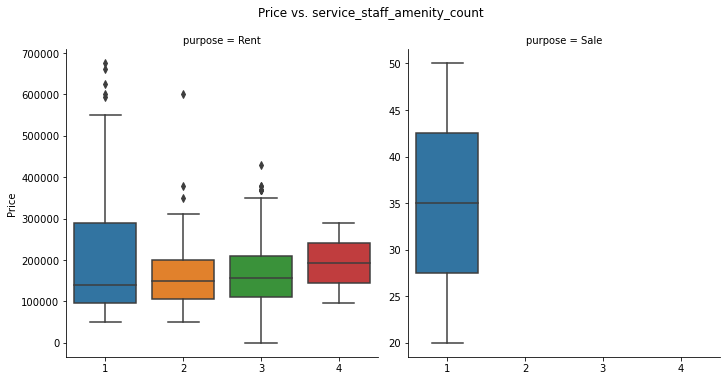

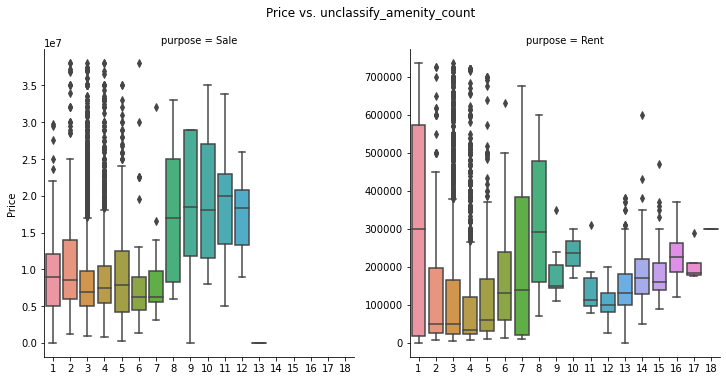

In [56]:
# Take a subset of data such that properties with very hight values (upper 5%tile) are excluded
df_sub = df[(((df.purpose == 'Rent') & (df.price <= percl_price_Rent['95%'])) | 
                    ((df.purpose == 'Sale') & (df.price <= percl_price_Sale['95%']))
                   )]

# Plotting the distribution of price over the count of each amenity type count
for amenity_name in amenities_vars:
    g = sb.catplot(y="price", 
                   x=amenity_name, #"security_amenity_count", 
                    data = df_sub[df_sub[amenity_name] > 0], 
                    kind="box",
                    col= "purpose", 
                    sharey = False
                   )

    g.set_axis_labels('', 'Price')
    # Exporting the plot image
    g.savefig(f"{exported_img_folder}/Price--vs--{amenity_name}-count.jpg");

    # Add row title
    fig = g.fig
    fig.suptitle(f"Price vs. {amenity_name}", y=1.05)

    plt.plot()
    

# Exporting the plot image
# g.savefig(f"{exported_img_folder}/Price--vs--amenity-types-count.jpg");

<span id="amenities-vs-prices--interpretation"></span>

       
TODO : 
- Provide interpretation for the above plot


<br/>

💡 The above plot, as well as its interpretation, will be put in our explanatory analysis (or in our presention).

<span id="types-vs-prices-worth"></span>
 
[EDA](#eda)  
### 9. Is it worth it to have properties types to explain the prices, or is properties natures enough for that ?
We want to understand if properties natures (Residential/Commercial) are enough to explain the prices or if we also need properties types (shop, apartment, ...) for that. Our end goal is to know if we should drop consider dropping properties types when building our models.      
This question was explored by Group 02.



In [57]:
# df[df['purpose'] == 'Rent'].groupby('building_type', as_index=False)['price'].mean()

In [58]:
# Calculate 'Sale' and 'Rent' means separately and merge

# Mean prices per property types (for sale and rent)
mean_price_per_type__sale = df[df['purpose'] == 'Sale'].groupby('building_type', as_index=False)['price'].mean()
mean_price_per_type__rent = df[df['purpose'] == 'Rent'].groupby('building_type', as_index=False)['price'].mean()


# Merging the above two dataframe
mean_prices_per_type = pd.merge( mean_price_per_type__sale, mean_price_per_type__rent, 
         on='building_type', how='outer', suffixes = ['_sale', '_rent']).fillna(0)

mean_prices_per_type.rename(columns={
    "price_sale":"mean_sale_price",
    "price_rent":"mean_rent_price"
}, inplace=True)

mean_prices_per_type

,building_type,mean_sale_price,mean_rent_price
0,Apartment,2.671628e+09,6.466751e+06
1,Building,7.466818e+07,8.760356e+07
2,Commercial Plot,8.602407e+07,2.253519e+05
3,Duplex,4.528889e+07,2.824167e+05
4,Floor,5.032089e+07,4.798500e+05
5,House,1.216533e+11,3.014254e+05
6,Office,3.868742e+07,3.283976e+05
7,Others,3.818133e+07,3.514000e+03
8,Residential Plot,2.159444e+07,7.715020e+05
9,Shop,5.289379e+06,2.787757e+05


Let us plot the result.

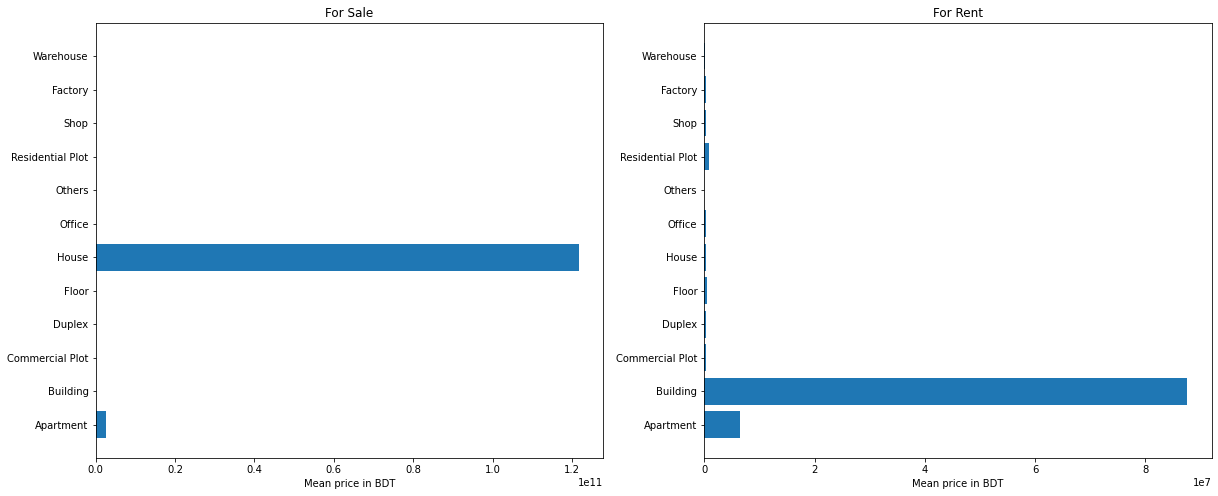

In [59]:
fig, ax = plt.subplots(1,2)

# First plot
ax[0].barh(mean_prices_per_type['building_type'], mean_prices_per_type['mean_sale_price'])
ax[0].set_title('For Sale')
# ax[0].set_xscale('log')
ax[0].set_xlabel('Mean price in BDT')


# # Second plot
ax[1].barh(mean_prices_per_type['building_type'], mean_prices_per_type['mean_rent_price'])
ax[1].set_title('For Rent')
# ax[1].set_xscale('log')
ax[1].set_xlabel('Mean price in BDT')

# Adjust the size of the figure
fig.set_size_inches([20,8])

plt.show()

We cannot gain to much information from the above plot. Let's improve it by using log scale on the x-axis.

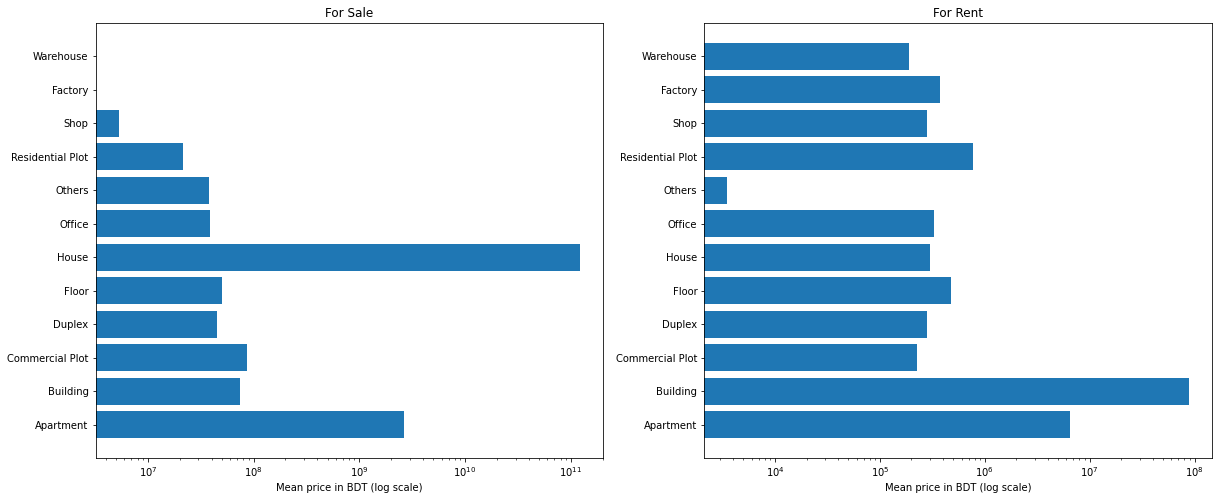

In [60]:
fig, ax = plt.subplots(1,2)

# First plot
ax[0].barh(mean_prices_per_type['building_type'], mean_prices_per_type['mean_sale_price'])
ax[0].set_title('For Sale')
ax[0].set_xscale('log')
ax[0].set_xlabel('Mean price in BDT (log scale)')


# # Second plot
ax[1].barh(mean_prices_per_type['building_type'], mean_prices_per_type['mean_rent_price'])
ax[1].set_title('For Rent')
ax[1].set_xscale('log')
ax[1].set_xlabel('Mean price in BDT (log scale)')

# Adjust the size of the figure
fig.set_size_inches([20,8])

plt.show()

<span id="types-vs-prices-worth--interpretation"></span>

       
TODO : 
- Provide interpretation for the above plot


<br/>

💡 The above plot, as well as its interpretation, will be put in our explanatory analysis (or in our presention).